<a href="https://colab.research.google.com/github/lucianogarim/Analise_Exploratoria_de_Dados_Petrofisica/blob/main/T%C3%B3pico_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de Dados para Petrofísica**

Nesta terceira aula iremos abordar tópicos de análise univariada.
As seguintes bibliotecas serão utilizadas:

1.   Pandas
2.   Matplotlib
3.   Numpy
4.   Seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patheffects as pe
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [2]:
# URL do conjunto de dados hospedado no GitHub
URL = 'https://raw.githubusercontent.com/andymcdgeo/Petrophysics-Python-Series/refs/heads/master/Data/Xeek_train_subset_clean.csv'

df = pd.read_csv(URL)
df.head()

,WELL,DEPTH_MD,GROUP,FORMATION,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC,LITH
0,15/9-13,494.528,NORDLAND GP.,NaN,19.480835,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,Shale
1,15/9-13,494.680,NORDLAND GP.,NaN,19.468800,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,Shale
2,15/9-13,494.832,NORDLAND GP.,NaN,19.468800,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,Shale
3,15/9-13,494.984,NORDLAND GP.,NaN,19.459282,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,Shale
4,15/9-13,495.136,NORDLAND GP.,NaN,19.453100,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,Shale


Vamos escolher um poço para analisar

In [3]:
# Verificando quais poços estão disponíveis no conjunto de dados
df.WELL.unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16'], dtype=object)

Vamos filtrar os dados para analisar um poço

In [4]:
# Vamos selecionar um poço
df_p1 = df[df['WELL'] == '15/9-13']
df_p1

,WELL,DEPTH_MD,GROUP,FORMATION,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC,LITH
0,15/9-13,494.528,NORDLAND GP.,NaN,19.480835,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,Shale
1,15/9-13,494.680,NORDLAND GP.,NaN,19.468800,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,Shale
2,15/9-13,494.832,NORDLAND GP.,NaN,19.468800,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,Shale
3,15/9-13,494.984,NORDLAND GP.,NaN,19.459282,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,Shale
4,15/9-13,495.136,NORDLAND GP.,NaN,19.453100,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,Shale
...,...,...,...,...,...,...,...,...,...,...,...,...
18265,15/9-13,3271.416,ZECHSTEIN GP.,Smith Bank Fm.,8.541623,8.065685,2.630211,19.418915,0.187811,NaN,NaN,Dolomite
18266,15/9-13,3271.568,ZECHSTEIN GP.,Smith Bank Fm.,8.557213,8.205255,2.643114,21.444370,0.185574,NaN,NaN,Dolomite
18267,15/9-13,3271.720,ZECHSTEIN GP.,Smith Bank Fm.,8.577917,8.249817,2.681300,22.646879,0.176074,NaN,NaN,Dolomite
18268,15/9-13,3271.872,ZECHSTEIN GP.,Smith Bank Fm.,8.478219,8.303959,2.738337,22.253584,0.174617,NaN,NaN,Dolomite


Vamos fazer as verificações iniciais no conjunto de dados.

In [5]:
# Verificando os tipos de dados
df_p1.dtypes

,0
WELL,object
DEPTH_MD,float64
GROUP,object
FORMATION,object
CALI,float64
RDEP,float64
RHOB,float64
GR,float64
NPHI,float64
PEF,float64


In [6]:
# Verificando valores nulos
df_p1.isna().sum()

,0
WELL,0
DEPTH_MD,0
GROUP,0
FORMATION,2464
CALI,0
RDEP,0
RHOB,0
GR,0
NPHI,4238
PEF,1830


In [7]:
# Vamos retirar todas as linhas com NaN
df_p1 = df_p1.dropna()
df_p1.head()

,WELL,DEPTH_MD,GROUP,FORMATION,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC,LITH
4238,15/9-13,1138.704,NORDLAND GP.,Utsira Fm.,19.322735,1.091499,1.774626,55.892757,0.765867,1.631495,147.837677,Sandstone
4239,15/9-13,1138.856,NORDLAND GP.,Utsira Fm.,18.613674,1.122706,1.800986,60.929138,0.800262,1.645080,142.382431,Shale
4240,15/9-13,1139.008,NORDLAND GP.,Utsira Fm.,18.212072,1.148141,1.817696,62.117264,0.765957,1.645873,138.258331,Shale
4241,15/9-13,1139.160,NORDLAND GP.,Utsira Fm.,18.134182,1.170984,1.829333,61.010860,0.702521,1.620216,139.198914,Shale
4242,15/9-13,1139.312,NORDLAND GP.,Utsira Fm.,18.033762,1.184080,1.813854,58.501236,0.639708,1.504854,144.290085,Shale


Criação de Tracks

In [8]:

# -------- Paletas --------
zone_colours = [
    "#E74C3C", "#3498DB", "#2ECC71", "#F1C40F", "#9B59B6",
    "#16A085", "#F39C12", "#7D3C98", "#1ABC9C", "#E67E22"
]

lito_colors = {
    'Sandstone':        '#F5C469',
    'Shale':            '#5D6D7E',
    'Sandstone/Shale':  '#B7950B',
    'Limestone':        '#AED6F1',
    'Tuff':             '#E67E22',
    'Marl':             '#A9DFBF'
}

def plot_poco(df):
    """
    Gera o painel petrofísico completo para um dataframe de poço.
    Espera colunas: ['DEPTH_MD','GR','CALI','RDEP','RHOB','NPHI','PEF','LITH','FORMATION']
    """

    # Mapeia cores por litologia
    cores = df['LITH'].map(lito_colors).fillna('#999999')

    # -------- Função auxiliar para intervalos --------
    def build_intervals(df, depth_col='DEPTH_MD', zone_col='FORMATION'):
        tmp = df[[depth_col, zone_col]].dropna().sort_values(depth_col)
        blocks = (tmp[zone_col] != tmp[zone_col].shift()).cumsum()
        ivals = tmp.groupby(blocks).agg(
            Top=(depth_col, 'min'),
            Base=(depth_col, 'max'),
            Formation=(zone_col, 'first')
        ).reset_index(drop=True)
        return ivals

    intervals = build_intervals(df)

    # -------- Figura / Eixos --------
    fig = plt.figure(figsize=(12,10))
    gs = GridSpec(nrows=1, ncols=6, width_ratios=[1.2,1,1,1,1,0.45], wspace=0.15)

    ax1 = fig.add_subplot(gs[0,0])  # GR + CALI
    ax2 = fig.add_subplot(gs[0,1])  # RDEP
    ax3 = fig.add_subplot(gs[0,2])  # RHOB
    ax4 = fig.add_subplot(gs[0,3])  # NPHI
    ax5 = fig.add_subplot(gs[0,4])  # PEF
    ax6 = fig.add_subplot(gs[0,5])  # Litologia

    zmin, zmax = df["DEPTH_MD"].min(), df["DEPTH_MD"].max()

    # -------- Track 1: GR + CALI --------
    if "GR" in df.columns:
        ax1.plot(df["GR"], df["DEPTH_MD"], color="green", lw=1, label="GR")
        ax1.set(xlabel="GR (API)", xlim=(0,200), ylabel="Depth (m)")
        ax1.xaxis.label.set_color("green")
        ax1.tick_params(axis='x', colors="green")
        ax1.spines["top"].set_edgecolor("green")

    # CALI twiny
    if "CALI" in df.columns:
        ax1b = ax1.twiny()
        ax1b.plot(df["CALI"], df["DEPTH_MD"], color="r", lw=1.0, label="CALI")
        ax1b.set(xlabel="CALI (in)", xlim=(6,25))
        ax1b.xaxis.label.set_color("r")
        ax1b.tick_params(axis='x', colors="r")
        ax1b.spines["top"].set_position(("axes", 1.08))
        ax1b.spines["top"].set_edgecolor("r")

    # -------- Track 2: RDEP (log) --------
    if "RDEP" in df.columns:
        rdep = df["RDEP"].clip(lower=1e-3)
        ax2.plot(rdep, df["DEPTH_MD"], color="crimson", lw=1.1)
        ax2.set_xscale('log')
        ax2.set(xlabel="RDEP (ohm·m)", xlim=(0.2, 200))
        ax2.xaxis.label.set_color("crimson")
        ax2.tick_params(axis='x', colors="crimson")

    # -------- Track 3: RHOB --------
    if "RHOB" in df.columns:
        ax3.plot(df["RHOB"], df["DEPTH_MD"], color="firebrick", lw=1.1)
        ax3.set(xlabel="RHOB (g/cc)", xlim=(1, 3))
        ax3.xaxis.label.set_color("firebrick")
        ax3.tick_params(axis='x', colors="firebrick")

    # -------- Track 4: NPHI --------
    if "NPHI" in df.columns:
        ax4.plot(df["NPHI"], df["DEPTH_MD"], color="royalblue", lw=1.1)
        ax4.set(xlabel="NPHI (v/v)", xlim=(0.7, 0.0))
        ax4.xaxis.label.set_color("royalblue")
        ax4.tick_params(axis='x', colors="royalblue")

    # -------- Track 5: PEF --------
    if "PEF" in df.columns:
        ax5.plot(df["PEF"], df["DEPTH_MD"], color="purple", lw=1.1)
        ax5.set(xlabel="PEF (b/e)", xlim=(9,2))
        ax5.xaxis.label.set_color("purple")
        ax5.tick_params(axis='x', colors="purple")

    # -------- Track 6: Litologia --------
    if "LITH" in df.columns:
        ax6.scatter(np.ones(len(df)), df["DEPTH_MD"], c=cores, s=4000, marker='_')
        ax6.set_xlabel('Lith')
        ax6.set_xlim(0.8, 1.2)

    # -------- Estilo comum --------
    for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
        ax.set_ylim(zmin, zmax)
        ax.invert_yaxis()
    for ax in [ax1, ax2, ax3, ax4, ax5]:
        ax.grid(which='major', color='lightgrey', linestyle='-', alpha=0.5)
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))

    for ax in [ax2, ax3, ax4, ax5]:
        plt.setp(ax.get_yticklabels(), visible=False)

    # -------- Sombreamento por Formation --------
    shade_axes = [ax1, ax2, ax3, ax4, ax5, ax6]
    for i, row in intervals.iterrows():
        color = zone_colours[i % len(zone_colours)]
        for ax in shade_axes:
            ax.axhspan(row['Top'], row['Base'], color=color, alpha=0.08)

    # -------- Rótulos das formações --------
    x0, x1 = ax1.get_xlim()
    dx = x1 - x0
    xmin_text = x0 + 0.02 * dx
    for _, row in intervals.iterrows():
        top, base = row['Top'], row['Base']
        if (base - top) < 0.5:
            continue
        mid = 0.5 * (top + base)
        ax1.text(
            xmin_text, mid, str(row['Formation']),
            va='center', ha='left', fontsize=8, color='black',
            bbox=dict(facecolor='white', alpha=0.65, edgecolor='none', pad=1.5),
            clip_on=False, zorder=10,
            path_effects=[pe.withStroke(linewidth=1, foreground='white', alpha=0.7)]
        )

    # -------- Legenda de Litologia --------
    if "LITH" in df.columns:
        present_litos = df['LITH'].dropna().unique().tolist()
        handles = [
            plt.Line2D([0],[0], marker='o', color='w',
                       markerfacecolor=lito_colors.get(l, '#999999'), markersize=8)
            for l in present_litos
        ]
        ax6.legend(handles, present_litos, title="Lithology",
                   loc='center left', bbox_to_anchor=(1.02,0.5), frameon=False)

    plt.tight_layout()
    plt.show()

/tmp/ipython-input-718440361.py:153: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


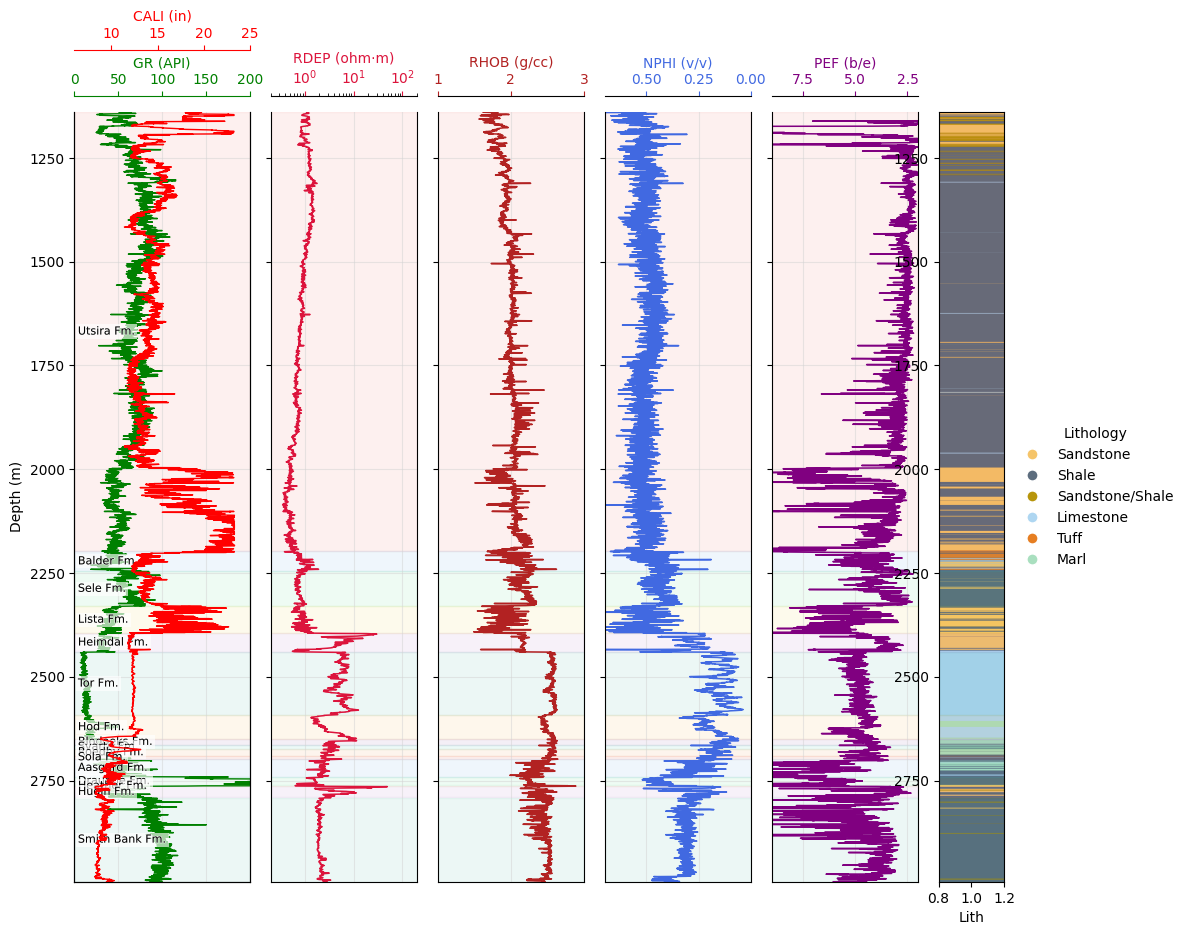

In [9]:
plot_poco(df_p1)

Vamos filtrar o poço pela formação

In [10]:
df_utsira_p1 = df_p1[df_p1['FORMATION'] == 'Utsira Fm.']

/tmp/ipython-input-718440361.py:153: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


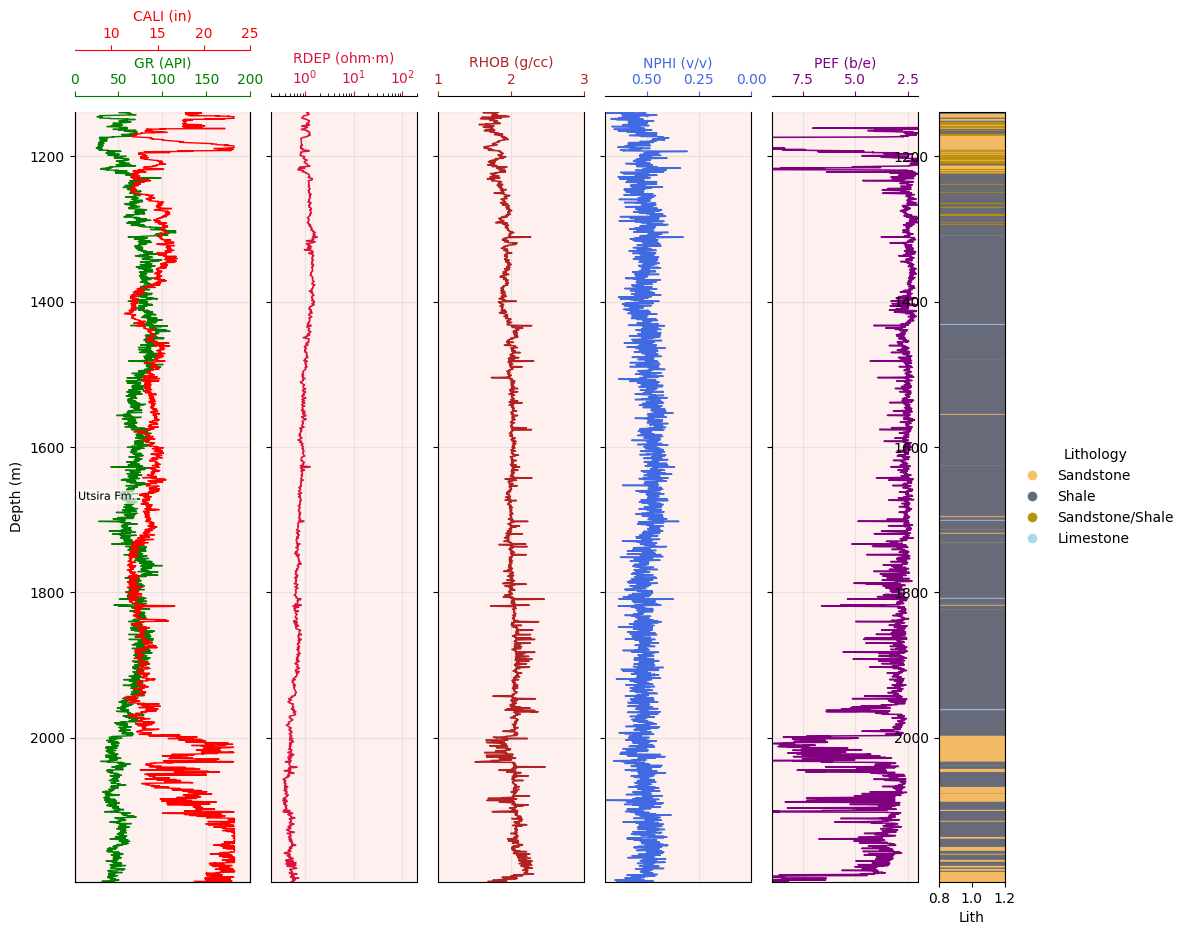

In [11]:
plot_poco(df_utsira_p1)

# Estatística Univariada

In [12]:
# Verificando estatísticas gerais dos dados
df_utsira_p1.describe()

,DEPTH_MD,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC
count,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000
mean,1668.099947,15.273522,0.855412,1.990129,65.778261,0.503240,3.229984,143.913578
std,305.768439,3.076003,0.310018,0.105752,15.207943,0.045046,1.746319,7.819386
min,1138.704000,11.399302,0.352202,1.508968,24.811256,0.305531,1.126667,93.377556
25%,1403.374000,13.232325,0.618986,1.941571,55.292151,0.472588,2.474169,142.224651
50%,1668.044000,14.326846,0.800419,2.008600,67.584587,0.501564,2.708104,145.754784
75%,1932.714000,15.750504,1.092586,2.049393,76.627983,0.530980,3.183908,148.082844
max,2197.992000,23.329569,1.796900,2.469037,115.508377,0.800262,17.026619,163.404480


# Histogramas

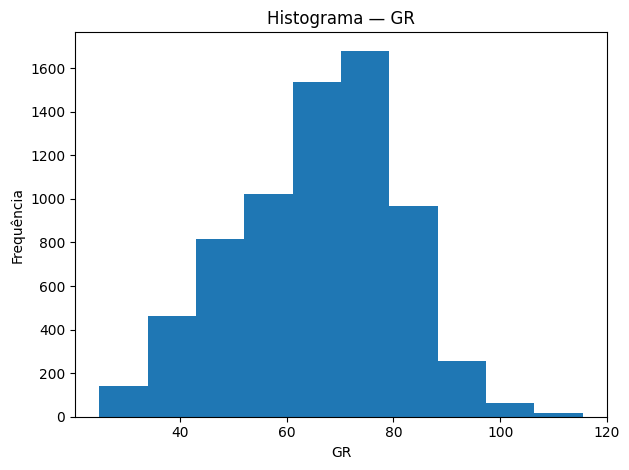

In [13]:
# === 1) HISTOGRAMA SIMPLES ===
plt.figure()
plt.hist(df_utsira_p1['GR'], bins=10)  # simples, sem cores
plt.xlabel('GR'); plt.ylabel('Frequência')
plt.title(f'Histograma — GR')
plt.tight_layout()
plt.show()

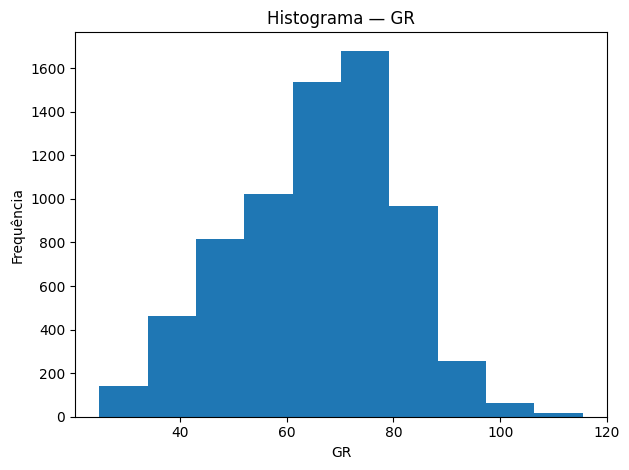

In [14]:
# === 1) HISTOGRAMA SIMPLES ===
plt.figure()
plt.hist(df_utsira_p1['GR'], bins=10)  # simples, sem cores
plt.xlabel('GR'); plt.ylabel('Frequência')
plt.title(f'Histograma — GR')
plt.tight_layout()
plt.show()

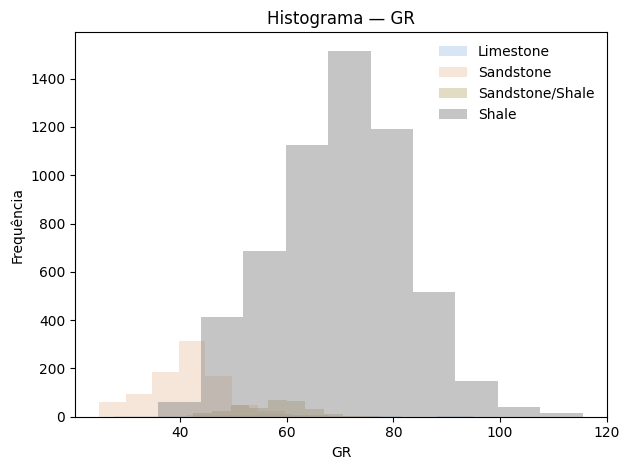

In [15]:
# === 2) HISTOGRAMA COLORIDO POR LITOLOGIA (overlay) ===
lito_colors = {
    'Sandstone':        '#EDC9AF',  # bege-amarelado
    'Shale':            '#808080',  # cinza-escuro
    'Sandstone/Shale':  '#C2B280',  # bege-acinzentado
    'Limestone':        '#A7C7E7',  # azul-claro
    'Tuff':             '#D2B48C',  # marrom-claro
    'Marl':             '#B4C79C',  # verde-acinzentado
}
present_litos = df_utsira_p1['LITH'].dropna().unique().tolist()

# ordena para dar estabilidade de cores
present_litos = sorted(present_litos, key=lambda x: str(x))

for lito in present_litos:
    mask = df_utsira_p1['LITH'] == lito
    x_lito = df_utsira_p1[mask]['GR']
    plt.hist(x_lito, bins=10, alpha=0.45, label=lito,
             color=lito_colors.get(lito, '#999999'))

plt.xlabel('GR'); plt.ylabel('Frequência')
plt.title(f'Histograma — GR')
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

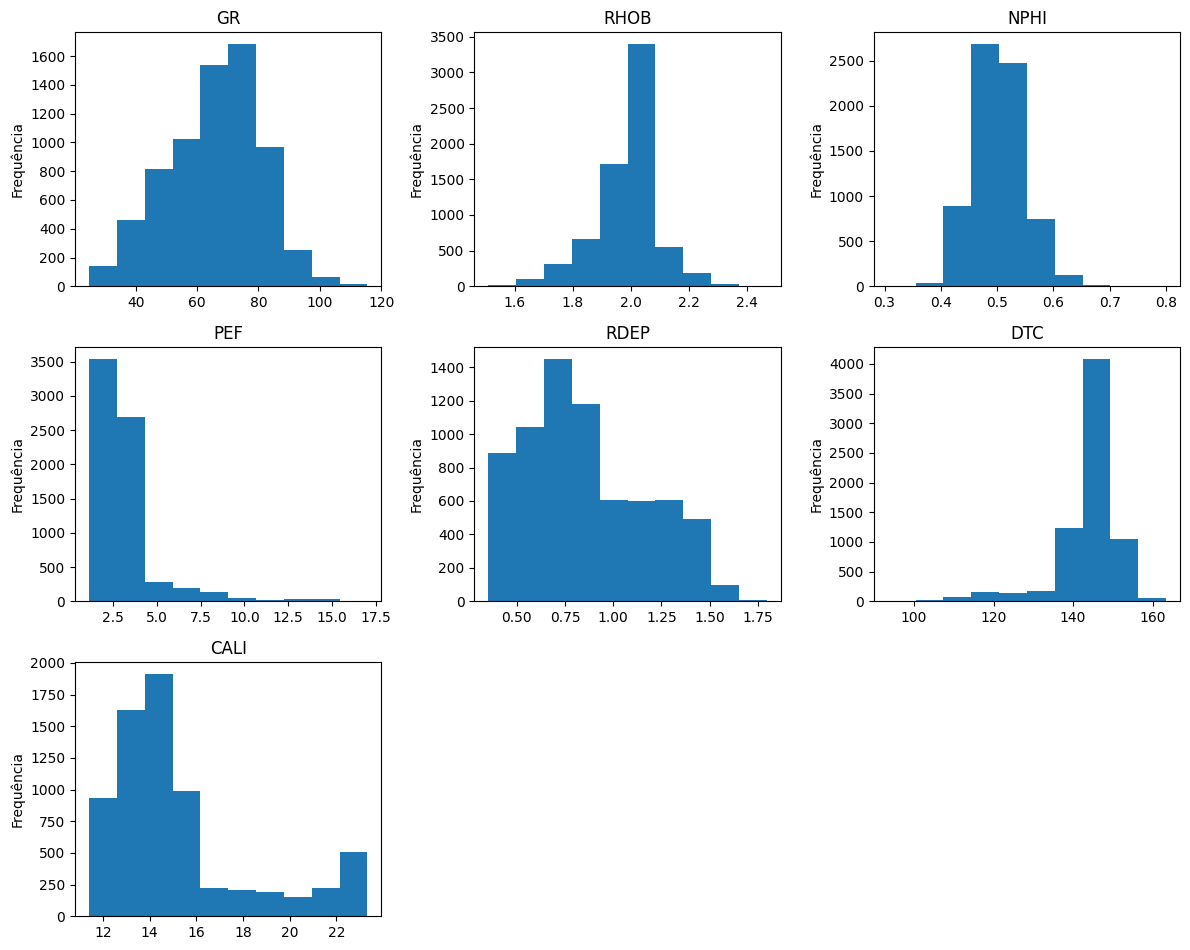

In [16]:
# === 3) HISTOGRAMAS DE TODAS AS VARIÁVEIS ===
vars_base = ['GR','RHOB','NPHI','PEF','RDEP','DTC','CALI']

n = len(vars_base)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.2*rows))
axes = axes.ravel()

for i, col in enumerate(vars_base):
    x = df_utsira_p1[col].dropna()
    axes[i].hist(x, bins=10)
    axes[i].set_title(col)
    axes[i].set_ylabel('Frequência')

# apaga eixos sobrando (se houver)
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


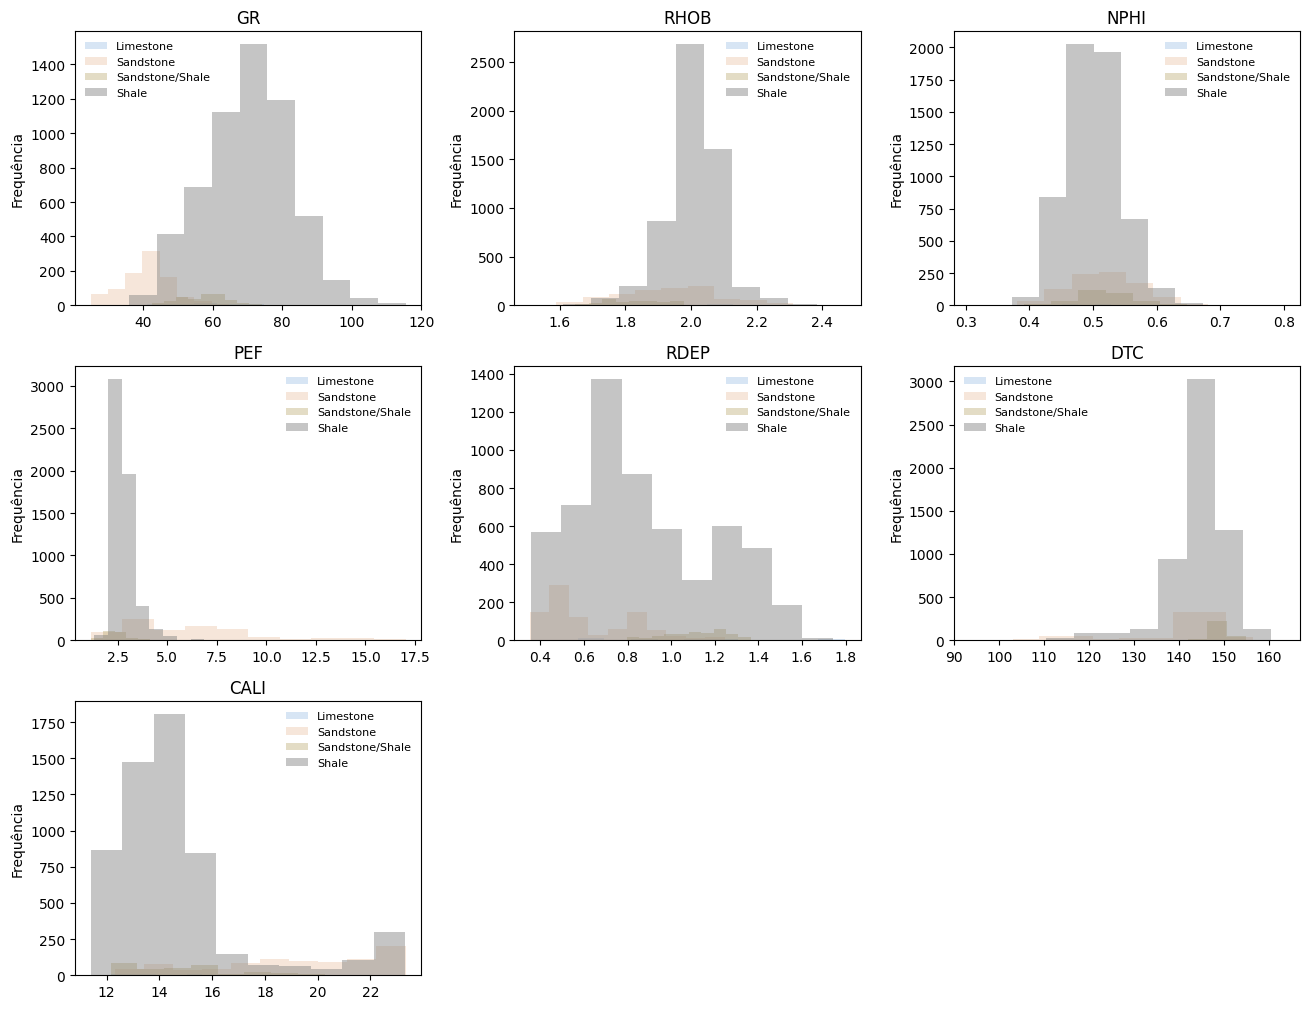

In [17]:
# === 4) HISTOGRAMAS DE TODAS AS VARIÁVEIS POR LITOLOGIA (overlay) ===
present_litos = df_utsira_p1['LITH'].dropna().unique().tolist()
present_litos = sorted(present_litos, key=lambda x: str(x))

n = len(vars_base)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(4.4*cols, 3.4*rows))
axes = axes.ravel()

for i, col in enumerate(vars_base):
    ax = axes[i]
    for lito in present_litos:
        mask = df_utsira_p1['LITH'] == lito
        x_lito = df_utsira_p1.loc[mask, col].dropna()
        if len(x_lito) == 0:
            continue
        ax.hist(x_lito, bins=10, alpha=0.45, label=lito,
                color=lito_colors.get(lito, '#999999'))
    ax.set_title(col)
    ax.set_ylabel('Frequência')
    ax.legend(frameon=False, fontsize=8)

# apaga eixos sobrando (se houver)
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


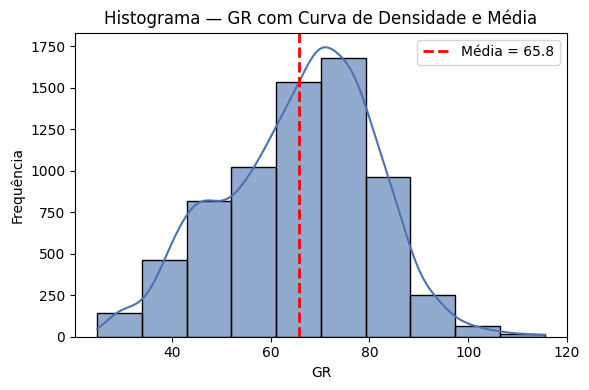

In [18]:
# Dados
x = df_utsira_p1['GR']

# Cálculos básicos
mean_val = x.mean()

# === HISTOGRAMA COM CURVA E MÉDIA ===
plt.figure(figsize=(6,4))
sns.histplot(x, bins=10, kde=True, color="#4C72B0", alpha=0.6, edgecolor='black')

# Linha da média
plt.axvline(mean_val, color='red', linestyle='--', lw=2, label=f'Média = {mean_val:.1f}')

# Configurações visuais
plt.xlabel('GR')
plt.ylabel('Frequência')
plt.title('Histograma — GR com Curva de Densidade e Média')
plt.legend()
plt.tight_layout()
plt.show()


#Gráfico de Barras

In [19]:
#Função genérica para mostrar um gráfico de barras.
def plot_lith_bar(df):
    """
    Gráfico de barras mostrando a contagem de amostras por litologia.
    """
    lith_counts = df['LITH'].value_counts().sort_index()
    colors = [lito_colors.get(l, '#999999') for l in lith_counts.index]

    plt.figure(figsize=(6,4))
    plt.bar(lith_counts.index, lith_counts.values, color=colors, edgecolor='black')
    plt.xlabel('Litologia')
    plt.ylabel('Contagem')
    plt.title('Distribuição de Litologias — Gráfico de Barras')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

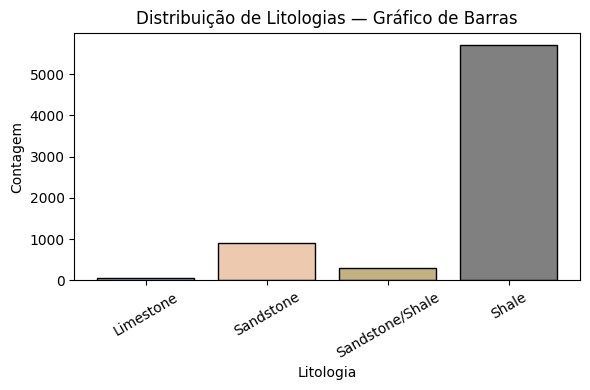

In [20]:
plot_lith_bar(df_utsira_p1)

# Gráfico de Pizza

In [21]:
def plot_lith_pie(df):
    """
    Gráfico de pizza mostrando a proporção de litologias.
    """
    lith_counts = df['LITH'].value_counts().sort_index()
    colors = [lito_colors.get(l, '#999999') for l in lith_counts.index]

    plt.figure(figsize=(6,6))
    plt.pie(
        lith_counts,
        labels=lith_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title('Distribuição de Litologias — Gráfico de Pizza')
    plt.tight_layout()
    plt.show()

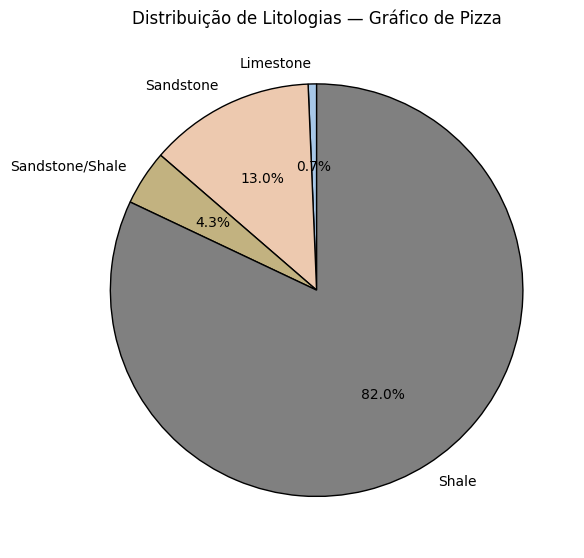

In [22]:
plot_lith_pie(df_utsira_p1)

# Boxplots

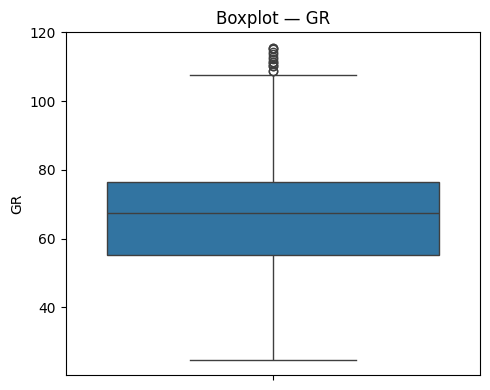

In [23]:
# BOXPLOT SIMPLES
plt.figure(figsize=(5,4))
sns.boxplot(y=df_utsira_p1['GR'])
plt.ylabel('GR')
plt.title('Boxplot — GR')
plt.tight_layout()
plt.show()

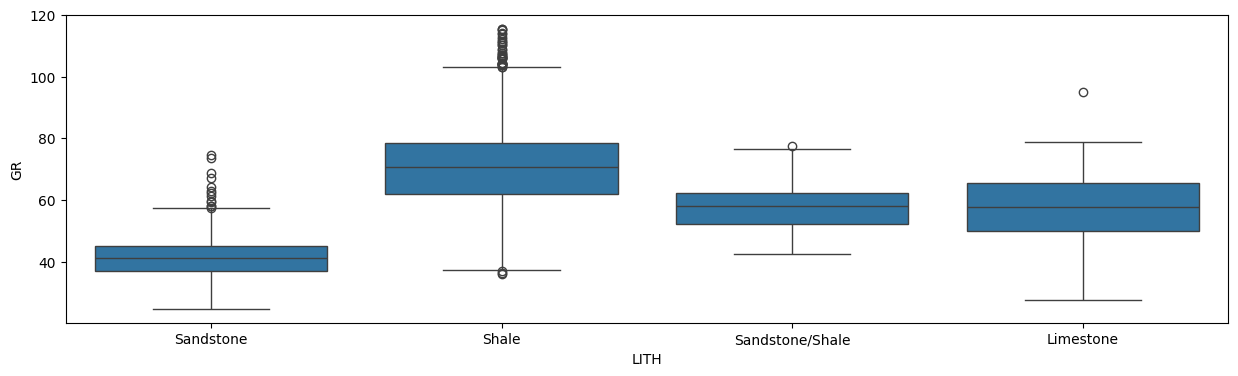

In [24]:
plt.figure(figsize=(15,4))
sns.boxplot( x=df_utsira_p1['LITH'], y=df_utsira_p1['GR']);

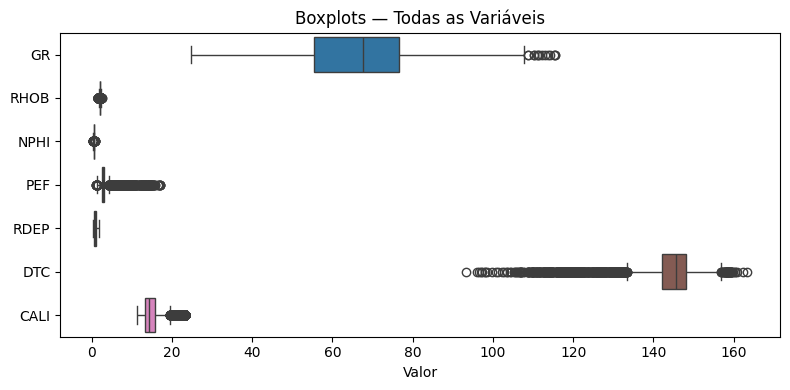

In [25]:
# BOXPLOTS DE TODAS AS VARIÁVEIS
vars_base = ['GR','RHOB','NPHI','PEF','RDEP','DTC','CALI']
plt.figure(figsize=(8,4))
sns.boxplot(data=df_utsira_p1[vars_base], orient='h')
plt.xlabel('Valor')
plt.title('Boxplots — Todas as Variáveis')
plt.tight_layout()
plt.show()

# Detecção de outliers

In [26]:
def plot_poco_outlier(df):
    """
    Gera o painel petrofísico completo para um dataframe de poço.
    Espera colunas: ['DEPTH_MD','GR','CALI','RDEP','RHOB','NPHI','PEF','LITH','FORMATION']
    Inclui detecção e marcação de outliers via Z-score.
    """

    # -------- Paletas --------
    zone_colours = [
        "#E74C3C", "#3498DB", "#2ECC71", "#F1C40F", "#9B59B6",
        "#16A085", "#F39C12", "#7D3C98", "#1ABC9C", "#E67E22"
    ]

    lito_colors = {
        'Sandstone':        '#EDC9AF',
        'Shale':            '#808080',
        'Sandstone/Shale':  '#C2B280',
        'Limestone':        '#A7C7E7',
        'Tuff':             '#D2B48C',
        'Marl':             '#B4C79C'
    }

    cores = df['LITH'].map(lito_colors).fillna('#999999')

    # -------- Função auxiliar --------
    def build_intervals(df, depth_col='DEPTH_MD', zone_col='FORMATION'):
        tmp = df[[depth_col, zone_col]].dropna().sort_values(depth_col)
        blocks = (tmp[zone_col] != tmp[zone_col].shift()).cumsum()
        ivals = tmp.groupby(blocks).agg(
            Top=(depth_col, 'min'),
            Base=(depth_col, 'max'),
            Formation=(zone_col, 'first')
        ).reset_index(drop=True)
        return ivals

    intervals = build_intervals(df)

    # -------- Cálculo de Z-score e outliers --------
    def zscore_outliers(series, threshold=3.0):
        s = series.dropna()
        z = (s - s.mean()) / s.std(ddof=0)
        return s.index[abs(z) > threshold]  # índices dos outliers

    outlier_indices = {}
    for col in ['GR', 'CALI', 'RDEP', 'RHOB', 'NPHI', 'PEF']:
        if col in df.columns:
            outlier_indices[col] = zscore_outliers(df[col])

    # -------- Figura / Eixos --------
    fig = plt.figure(figsize=(12,10))
    gs = GridSpec(nrows=1, ncols=6, width_ratios=[1.2,1,1,1,1,0.45], wspace=0.15)
    ax1 = fig.add_subplot(gs[0,0])
    ax2 = fig.add_subplot(gs[0,1])
    ax3 = fig.add_subplot(gs[0,2])
    ax4 = fig.add_subplot(gs[0,3])
    ax5 = fig.add_subplot(gs[0,4])
    ax6 = fig.add_subplot(gs[0,5])

    zmin, zmax = df["DEPTH_MD"].min(), df["DEPTH_MD"].max()

    # -------- Track 1: GR + CALI --------
    if "GR" in df.columns:
        ax1.plot(df["GR"], df["DEPTH_MD"], color="green", lw=1, label="GR")
        ax1.set(xlabel="GR (API)", xlim=(0,200), ylabel="Depth (m)")
        ax1.xaxis.label.set_color("green")
        ax1.tick_params(axis='x', colors="green")
        ax1.spines["top"].set_edgecolor("green")
        # outliers GR
        if not outlier_indices['GR'].empty:
            ax1.scatter(df.loc[outlier_indices['GR'], "GR"],
                        df.loc[outlier_indices['GR'], "DEPTH_MD"],
                        marker='x', color='red', s=50, label='Outlier')

    # CALI twiny
    if "CALI" in df.columns:
        ax1b = ax1.twiny()
        ax1b.plot(df["CALI"], df["DEPTH_MD"], color="r", lw=1.0, label="CALI")
        ax1b.set(xlabel="CALI (in)", xlim=(6,25))
        ax1b.xaxis.label.set_color("r")
        ax1b.tick_params(axis='x', colors="r")
        ax1b.spines["top"].set_position(("axes", 1.08))
        ax1b.spines["top"].set_edgecolor("r")
        # outliers CALI
        if not outlier_indices['CALI'].empty:
            ax1b.scatter(df.loc[outlier_indices['CALI'], "CALI"],
                         df.loc[outlier_indices['CALI'], "DEPTH_MD"],
                         marker='x', color='black', s=40)

    # -------- Track 2: RDEP --------
    if "RDEP" in df.columns:
        rdep = df["RDEP"].clip(lower=1e-3)
        ax2.plot(rdep, df["DEPTH_MD"], color="crimson", lw=1.1)
        ax2.set_xscale('log')
        ax2.set(xlabel="RDEP (ohm·m)", xlim=(0.2, 200))
        ax2.xaxis.label.set_color("crimson")
        ax2.tick_params(axis='x', colors="crimson")
        if not outlier_indices['RDEP'].empty:
            ax2.scatter(df.loc[outlier_indices['RDEP'], "RDEP"],
                        df.loc[outlier_indices['RDEP'], "DEPTH_MD"],
                        marker='x', color='red', s=50)

    # -------- Track 3: RHOB --------
    if "RHOB" in df.columns:
        ax3.plot(df["RHOB"], df["DEPTH_MD"], color="firebrick", lw=1.1)
        ax3.set(xlabel="RHOB (g/cc)", xlim=(1, 3))
        ax3.xaxis.label.set_color("firebrick")
        ax3.tick_params(axis='x', colors="firebrick")
        if not outlier_indices['RHOB'].empty:
            ax3.scatter(df.loc[outlier_indices['RHOB'], "RHOB"],
                        df.loc[outlier_indices['RHOB'], "DEPTH_MD"],
                        marker='x', color='red', s=50)

    # -------- Track 4: NPHI --------
    if "NPHI" in df.columns:
        ax4.plot(df["NPHI"], df["DEPTH_MD"], color="royalblue", lw=1.1)
        ax4.set(xlabel="NPHI (v/v)", xlim=(0.7, 0.0))
        ax4.xaxis.label.set_color("royalblue")
        ax4.tick_params(axis='x', colors="royalblue")
        if not outlier_indices['NPHI'].empty:
            ax4.scatter(df.loc[outlier_indices['NPHI'], "NPHI"],
                        df.loc[outlier_indices['NPHI'], "DEPTH_MD"],
                        marker='x', color='red', s=50)

    # -------- Track 5: PEF --------
    if "PEF" in df.columns:
        ax5.plot(df["PEF"], df["DEPTH_MD"], color="purple", lw=1.1)
        ax5.set(xlabel="PEF (b/e)", xlim=(9,2))
        ax5.xaxis.label.set_color("purple")
        ax5.tick_params(axis='x', colors="purple")
        if not outlier_indices['PEF'].empty:
            ax5.scatter(df.loc[outlier_indices['PEF'], "PEF"],
                        df.loc[outlier_indices['PEF'], "DEPTH_MD"],
                        marker='x', color='red', s=50)

    # -------- Track 6: Litologia --------
    if "LITH" in df.columns:
        ax6.scatter(np.ones(len(df)), df["DEPTH_MD"], c=cores, s=4000, marker='_')
        ax6.set_xlabel('Lith')
        ax6.set_xlim(0.8, 1.2)

    # -------- Layout --------
    for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
        ax.set_ylim(zmin, zmax)
        ax.invert_yaxis()
    for ax in [ax1, ax2, ax3, ax4, ax5]:
        ax.grid(which='major', color='lightgrey', linestyle='-', alpha=0.5)
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))
    for ax in [ax2, ax3, ax4, ax5]:
        plt.setp(ax.get_yticklabels(), visible=False)

    # -------- Sombreamento e rótulos --------
    shade_axes = [ax1, ax2, ax3, ax4, ax5, ax6]
    for i, row in intervals.iterrows():
        color = zone_colours[i % len(zone_colours)]
        for ax in shade_axes:
            ax.axhspan(row['Top'], row['Base'], color=color, alpha=0.08)

    x0, x1 = ax1.get_xlim(); dx = x1 - x0
    xmin_text = x0 + 0.02 * dx
    for _, row in intervals.iterrows():
        top, base = row['Top'], row['Base']
        if (base - top) < 0.5:
            continue
        mid = 0.5*(top + base)
        ax1.text(xmin_text, mid, str(row['Formation']),
                 va='center', ha='left', fontsize=8, color='black',
                 bbox=dict(facecolor='white', alpha=0.65, edgecolor='none', pad=1.5),
                 clip_on=False, zorder=10,
                 path_effects=[pe.withStroke(linewidth=1, foreground='white', alpha=0.7)])

    # -------- Legenda --------
    if "LITH" in df.columns:
        present_litos = df['LITH'].dropna().unique().tolist()
        handles = [plt.Line2D([0],[0], marker='o', color='w',
                              markerfacecolor=lito_colors.get(l, '#999999'), markersize=8)
                   for l in present_litos]
        ax6.legend(handles, present_litos, title="Lithology",
                   loc='center left', bbox_to_anchor=(1.02,0.5), frameon=False)

    plt.tight_layout()
    plt.show()


/tmp/ipython-input-82896787.py:182: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


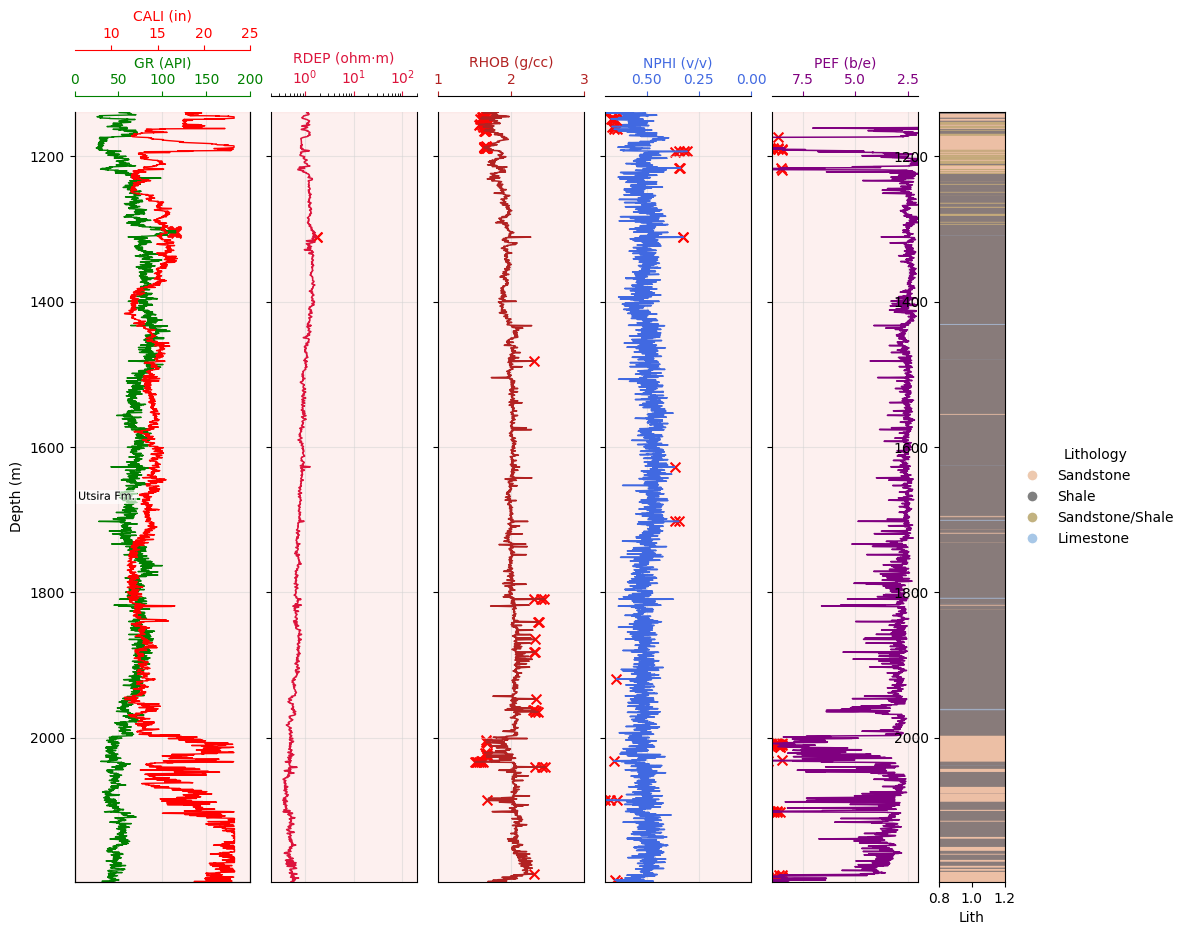

In [27]:
plot_poco_outlier(df_utsira_p1)

In [28]:
def replace_outliers_with_mean(series, threshold=3.0):
    s = series.copy()
    mean = s.mean()
    std = s.std(ddof=0)
    z = (s - mean) / std
    s[abs(z) > threshold] = mean
    return s

In [29]:
df_utsira_p1['GR'] = replace_outliers_with_mean(df_utsira_p1['GR'])

/tmp/ipython-input-1448715082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_utsira_p1['GR'] = replace_outliers_with_mean(df_utsira_p1['GR'])
